<a href="https://colab.research.google.com/github/juanalistapablo/FLor_Iris_Modelo_MLP/blob/main/flora_ameacada_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mensuração de Dados

In [ ]:
import pandas as pd

# Carregar o arquivo (substitua 'caminho_do_arquivo' pelo caminho real do seu arquivo no Colab)
file_path = "/content/flora-ameacada-2021.csv"

# Ler o arquivo corrigindo o delimitador e a codificação
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Exibir as primeiras linhas para verificar a estrutura
df.head()


,#,Família (FB 2020),Espécie (FB 2020),Nome avaliação anterior,Categoria em 2014,Sugestão de Categoria 2021,EW,CR,"EN,",VU,Mesma Categoria de Ameaça 2014,Aumentou a Categoria de Ameaça,Reduziu a Categoria de Ameaça,Entrou em Categoria de Ameaça,Saíram da Categoria de Ameaça,Saíram da Lista por serem sinonímias taxonômicas
0,1,Acanthaceae,Aphelandra espirito-santensis Profice & Wassh.,Aphelandra espirito-santensis,Em Perigo (EN),Em Perigo (EN),NaN,NaN,X,NaN,X,NaN,NaN,NaN,62 espécies,74 espécies
1,2,Acanthaceae,Aphelandra margaritae E.Morren,Aphelandra margaritae,Vulnerável (VU),Vulnerável (VU),NaN,NaN,NaN,X,X,NaN,NaN,NaN,NaN,NaN
2,3,Acanthaceae,Aphelandra maximiliana (Nees) Benth.,Aphelandra maximiliana,Em Perigo (EN),Em Perigo (EN),NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN
3,4,Acanthaceae,Aphelandra rigida Glaz. ex Mildbr.,Aphelandra rigida,NaN,Em Perigo (EN),NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN
4,5,Acanthaceae,Aphelandra stephanophysa Nees,Aphelandra stephanophysa,NaN,Vulnerável (VU),NaN,NaN,NaN,X,NaN,NaN,NaN,X,NaN,NaN


In [ ]:
# Verificar informações gerais
df.info()

# Verificar valores nulos em cada coluna
missing_values = df.isnull().sum()

# Exibir os valores nulos
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   #                                                 3212 non-null   int64  
 1   Família (FB 2020)                                 3212 non-null   object 
 2   Espécie (FB 2020)                                 3212 non-null   object 
 3   Nome avaliação anterior                           3212 non-null   object 
 4   Categoria em 2014                                 1969 non-null   object 
 5   Sugestão de Categoria 2021                        3212 non-null   object 
 6   EW                                                0 non-null      float64
 7   CR                                                687 non-null    object 
 8   EN,                                               1848 non-null   object 
 9   VU                 

,0
#,0
Família (FB 2020),0
Espécie (FB 2020),0
Nome avaliação anterior,0
Categoria em 2014,1243
Sugestão de Categoria 2021,0
EW,3212
CR,2525
"EN,",1364
VU,2535


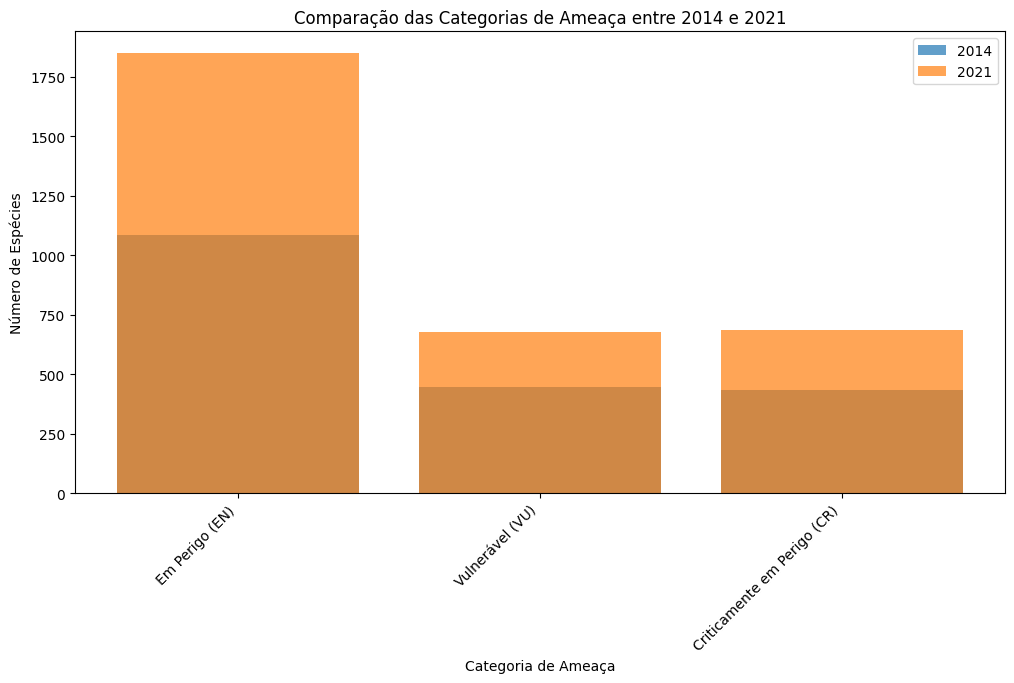

In [ ]:
import matplotlib.pyplot as plt

# Contagem de categorias em 2014 e 2021
categoria_2014 = df["Categoria em 2014"].value_counts()
categoria_2021 = df["Sugestão de Categoria 2021"].value_counts()

# Criar gráfico de barras para comparar as categorias de ameaça
plt.figure(figsize=(12, 6))
plt.bar(categoria_2014.index, categoria_2014.values, alpha=0.7, label="2014")
plt.bar(categoria_2021.index, categoria_2021.values, alpha=0.7, label="2021")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Categoria de Ameaça")
plt.ylabel("Número de Espécies")
plt.title("Comparação das Categorias de Ameaça entre 2014 e 2021")
plt.legend()
plt.show()


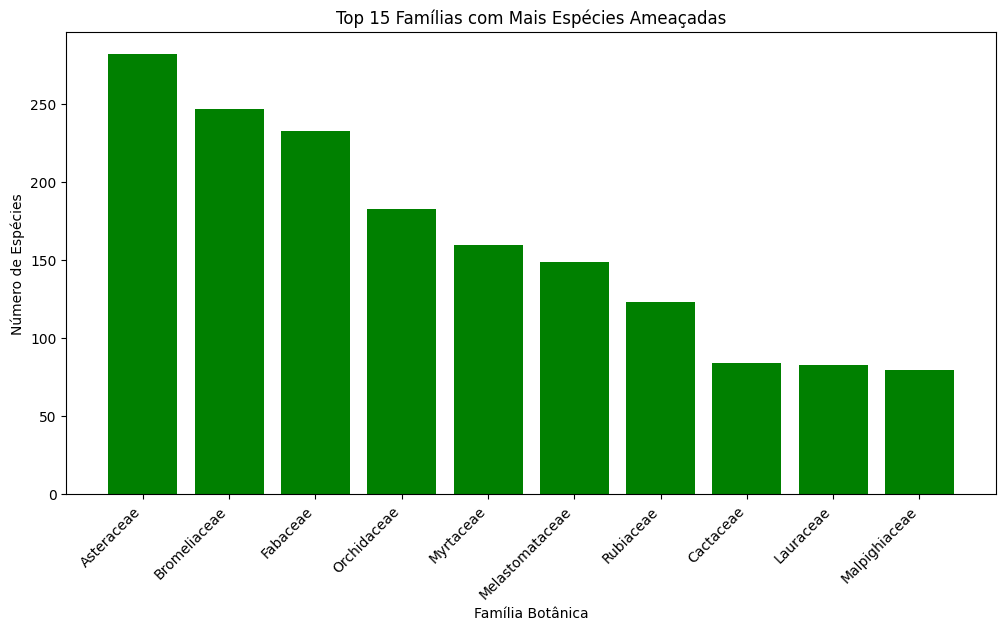

In [ ]:
# Contagem do número de espécies por família
familia_counts = df["Família (FB 2020)"].value_counts().head(10)  # Top 10

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(familia_counts.index, familia_counts.values, color="green")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Família Botânica")
plt.ylabel("Número de Espécies")
plt.title("Top 15 Famílias com Mais Espécies Ameaçadas")
plt.show()


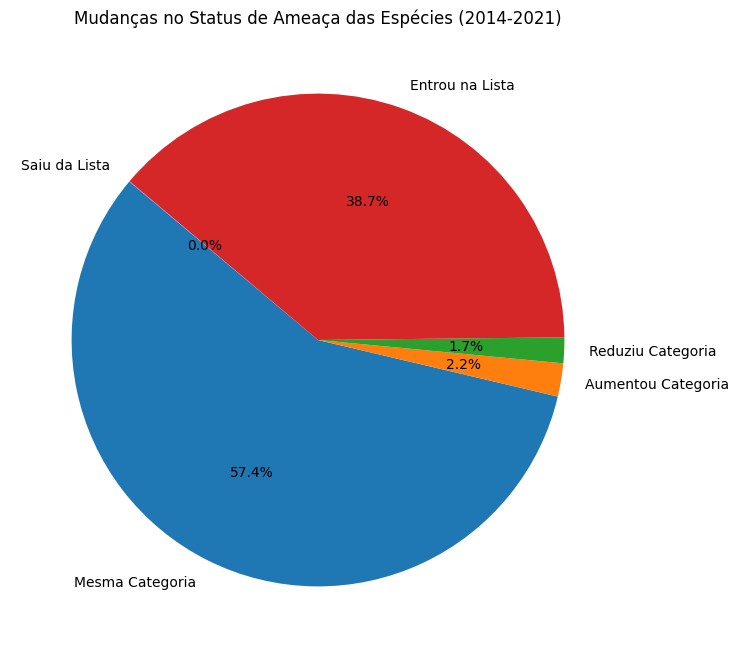

In [ ]:
# Contagem de mudanças no status de ameaça
mudancas_status = {
    "Mesma Categoria": df["Mesma Categoria de Ameaça 2014"].count(),
    "Aumentou Categoria": df["Aumentou a Categoria de Ameaça"].count(),
    "Reduziu Categoria": df["Reduziu a Categoria de Ameaça"].count(),
    "Entrou na Lista": df["Entrou em Categoria de Ameaça"].count(),
    "Saiu da Lista": df["Saíram da Categoria de Ameaça"].count()
}

# Criar gráfico de pizza para visualizar as mudanças
plt.figure(figsize=(8, 8))
plt.pie(mudancas_status.values(), labels=mudancas_status.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Mudanças no Status de Ameaça das Espécies (2014-2021)")
plt.show()


# Tratamento de dados




##Selecionar variáveis relevantes

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Selecionar colunas relevantes para o clustering
cols_cluster = ["Categoria em 2014", "Sugestão de Categoria 2021", "Entrou em Categoria de Ameaça"]
df_cluster = df[cols_cluster].copy()

##Tratando os Dados das Variáveis Explicativas

In [ ]:
# Converter variáveis categóricas para numéricas usando Label Encoding
encoder = LabelEncoder()
df_cluster["Categoria em 2014"] = encoder.fit_transform(df_cluster["Categoria em 2014"].astype(str))
df_cluster["Sugestão de Categoria 2021"] = encoder.fit_transform(df_cluster["Sugestão de Categoria 2021"].astype(str))


In [ ]:
# Substituir valores nulos por 0 (considerando que NaN significa ausência de mudança)
df_cluster["Entrou em Categoria de Ameaça"] = df_cluster["Entrou em Categoria de Ameaça"].notnull().astype(int)

# Exibir a estrutura dos dados preparados
df_cluster.head()

,Categoria em 2014,Sugestão de Categoria 2021,Entrou em Categoria de Ameaça
0,1,1,1
1,2,2,1
2,1,1,1
3,3,1,1
4,3,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar os dados para garantir escalas uniformes
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Exibir os dados normalizados
df_cluster_scaled[:5]


array([[-0.70458596,  0.0047776 ,  0.        ],
       [ 0.20139086,  1.53934349,  0.        ],
       [-0.70458596,  0.0047776 ,  0.        ],
       [ 1.10736769,  0.0047776 ,  0.        ],
       [ 1.10736769,  1.53934349,  0.        ]])

#Modelo de clusters

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-Means com 3 clusters (pode ser ajustado)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

# Exibir os clusters identificados
df[["Família (FB 2020)", "Espécie (FB 2020)", "Cluster"]].head(10)


,Família (FB 2020),Espécie (FB 2020),Cluster
0,Acanthaceae,Aphelandra espirito-santensis Profice & Wassh.,0
1,Acanthaceae,Aphelandra margaritae E.Morren,2
2,Acanthaceae,Aphelandra maximiliana (Nees) Benth.,0
3,Acanthaceae,Aphelandra rigida Glaz. ex Mildbr.,1
4,Acanthaceae,Aphelandra stephanophysa Nees,2
5,Acanthaceae,Dyschoriste lavandulacea (Nees) Kuntze,0
6,Acanthaceae,Dyschoriste smithii Leonard,0
7,Acanthaceae,Justicia clausseniana (Nees) Profice,0
8,Acanthaceae,Justicia genuflexa Nees & Mart.,2
9,Acanthaceae,Justicia meyeniana (Nees) Lindau,1


from matplotlib import pyplot as plt
_df_0['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Calcular a média das variáveis dentro de cada cluster
cluster_media = df_cluster.copy()
cluster_media["Cluster"] = df["Cluster"]
cluster_media = cluster_media.groupby("Cluster").mean()

# Criar um dicionário com a descrição de cada cluster
cluster_descricao = {}
for i in range(len(cluster_media)):
    cluster_descricao[f"Cluster {i}"] = cluster_media.iloc[i].sort_values(ascending=False)

# Exibir os resultados
cluster_descricao


{'Cluster 0': Categoria em 2014                3.000000
 Entrou em Categoria de Ameaça    1.000000
 Sugestão de Categoria 2021       0.996782
 Name: 0, dtype: float64,
 'Cluster 1': Sugestão de Categoria 2021       1.270550
 Categoria em 2014                1.264078
 Entrou em Categoria de Ameaça    0.000000
 Name: 1, dtype: float64,
 'Cluster 2': Categoria em 2014                0.066038
 Sugestão de Categoria 2021       0.000000
 Entrou em Categoria de Ameaça    0.000000
 Name: 2, dtype: float64}